In [1]:
# Importaciones principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 1. Soluciones Análisis de Datos
#### Ejercicio 1.1 Perfil Epidemiológico de Enfermedades Cardiovasculares

Estadisticas descriptivas
              Edad   Colesterol  Presion_Arterial          IMC     Diabetes
count  1000.000000  1000.000000       1000.000000  1000.000000  1000.000000
mean     55.289981   201.189340        130.073522    26.769855     0.304000
std      14.688239    39.362703         20.131601     5.060626     0.460213
min       6.380990    79.219514         70.177281    11.961838     0.000000
25%      45.286145   175.148078        115.795433    23.424893     0.000000
50%      55.379509   200.670756        130.070712    26.798203     0.000000
75%      64.719158   227.370264        143.647426    29.927253     1.000000
max     112.790972   327.724303        208.524754    43.215465     1.000000


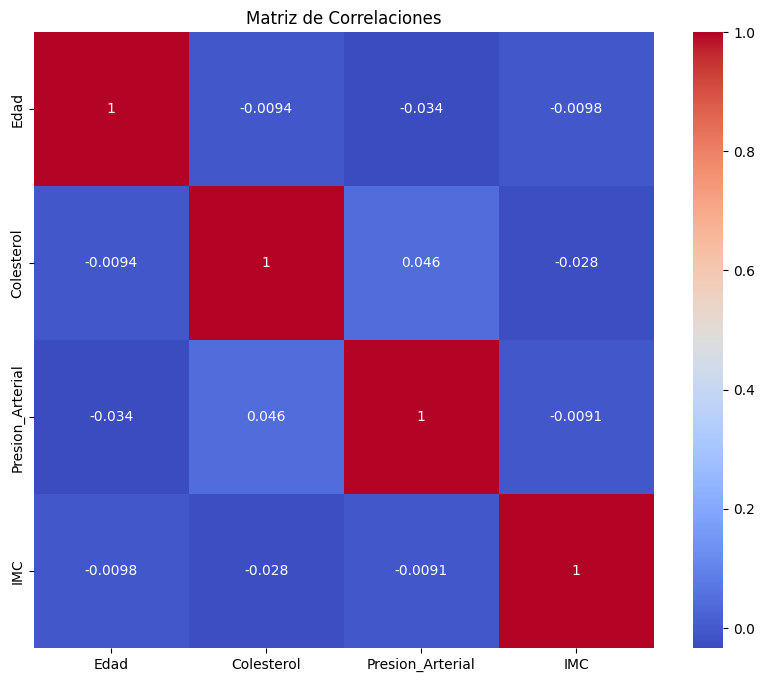

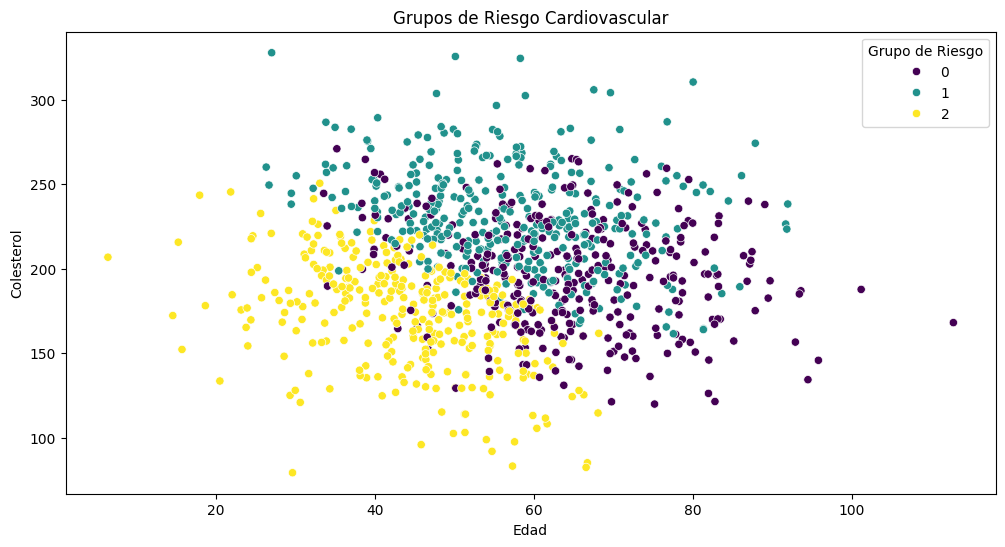


Riesgo Cardiovascular por Género
Genero
Femenino     0.322896
Masculino    0.554192
Name: Riesgo_Cardiovascular, dtype: float64

Prueba t de diferencia de riesgo por género
Estadistico t: 7.574484068278763
Valor p: 8.202755546699096e-14
int64
int64


In [4]:
# Generación datos sintéticos
def generar_datos_cardiovasculares(n_muestras=1000):
    np.random.seed(42)

    # Generación de variables
    edad = np.random.normal(55, 15, n_muestras)
    genero = np.random.choice(['Masculino', 'Femenino'], n_muestras)
    colesterol = np.random.normal(200, 40, n_muestras)
    presion_arterial = np.random.normal(130, 20, n_muestras)
    imc = np.random.normal(27, 5, n_muestras)
    diabetes = np.random.choice([0,1], n_muestras, p = [0.7, 0.3])

    # Cálculo de riesgo cardiovascular
    riesgo = (
        (edad > 50) * 0.3 +
        (genero == 'Masculino') * 0.2 +
        (colesterol > 240) * 0.25 +
        (presion_arterial > 140) * 0.2 +
        (imc > 30) * 0.15 +
        (diabetes == 1) * 0.3
    )

    # Convertir el DatyaFrame
    df = pd.DataFrame({
        'Edad' : edad,
        'Genero' : genero,
        'Colesterol' : colesterol,
        'Presion_Arterial' : presion_arterial,
        'IMC' : imc,
        'Diabetes' : diabetes,
        'Riesgo_Cardiovascular' : riesgo > 0.5
    })

    return df

datos_cv = generar_datos_cardiovasculares()

def analisis_perfil_cardiovascular(df):
    # Estadísticas descriptivas
    print("Estadisticas descriptivas")
    print(df.describe())

    # Correlaciones
    correlaciones = df[['Edad', 'Colesterol', 'Presion_Arterial', 'IMC']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlaciones')
    plt.show()

    # Segmentar los grupos de riesgo
    features = ['Edad', 'Colesterol', 'Presion_Arterial', 'IMC']
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(df[features])
    
    kmeas = KMeans(n_clusters=3, random_state=42)
    df['Grupo de Riesgo'] = kmeas.fit_predict(datos_escalados)

    # Visualización de grupos de riesgo
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=df, x='Edad', y='Colesterol', hue='Grupo de Riesgo', palette='viridis')
    plt.title('Grupos de Riesgo Cardiovascular')
    plt.show()

    # Analisis de riesgo de género
    riesgo_por_genero = df.groupby('Genero')['Riesgo_Cardiovascular'].mean()
    print("\nRiesgo Cardiovascular por Género")
    print(riesgo_por_genero)

    # Prueba Estadística de diferencia de riesgo por género
    riesgo_masculino = df[df['Genero'] == 'Masculino']['Riesgo_Cardiovascular']
    riesgo_femenino = df[df['Genero'] == 'Femenino']['Riesgo_Cardiovascular']

    riesgo_masculino = riesgo_masculino.astype(int)
    riesgo_femenino = riesgo_femenino.astype(int)
    
    t_statistic, p_value = stats.ttest_ind(riesgo_masculino, riesgo_femenino)
    print(f"\nPrueba t de diferencia de riesgo por género")
    print(f'Estadistico t: {t_statistic}')
    print(f"Valor p: {p_value}")

    print(riesgo_masculino.dtype)
    print(riesgo_femenino.dtype)
    
# Ejecutar Analisis
analisis_perfil_cardiovascular(datos_cv)